# 캡스톤디자인 

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
import matplotlib.pyplot as plt
from xgboost import plot_importance
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import datetime
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance
!pip install prophet
import pandas as pd
from prophet import Prophet
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 한솔쿤 test1

In [ ]:
# Add columns with year, month, and weekday name
merged_df['Year']         = pd.DatetimeIndex(merged_df.index).year
merged_df['Month']        = pd.DatetimeIndex(merged_df.index).month
#merged_df['Weekday Name'] = pd.DatetimeIndex(merged_df.index).weekday_name

# Display a random sampling of 5 rows
#merged_df.sample(10, random_state=0)

In [ ]:
location3 = ("/content/weak_test1.csv")
han1 = pd.read_csv(location3)


In [ ]:
han1 = han1.set_index('Order Date')

In [ ]:
han1

,Quantity,Sales,Discount,Profit
Order Date,,,,
2019-01-01 0:00,13,32.637859,0.0,-1729.539925
2019-01-02 0:00,30,346.814595,0.6,208.930534
2019-01-03 0:00,11,132.786841,0.2,412.483706
2019-01-04 0:00,3,198.326176,0.0,-37.162625
2019-01-05 0:00,14,213.019376,0.2,345.950032
...,...,...,...,...
2020-01-28 0:00,5,209.896415,0.4,287.340799
2020-01-29 0:00,54,131.927550,0.3,51.021467
2020-01-30 0:00,4,107.478729,0.6,-41.286917


In [ ]:
new_order = ['Quantity', 'Sales', 'Discount', 'Profit']
han1 = han1.reindex(columns=new_order)
han1

,Quantity,Sales,Discount,Profit
Order Date,,,,
2019-01-01 0:00,13,32.637859,0.0,-1729.539925
2019-01-02 0:00,30,346.814595,0.6,208.930534
2019-01-03 0:00,11,132.786841,0.2,412.483706
2019-01-04 0:00,3,198.326176,0.0,-37.162625
2019-01-05 0:00,14,213.019376,0.2,345.950032
...,...,...,...,...
2020-01-28 0:00,5,209.896415,0.4,287.340799
2020-01-29 0:00,54,131.927550,0.3,51.021467
2020-01-30 0:00,4,107.478729,0.6,-41.286917


In [ ]:

# Add columns with year, month, and weekday name
han1['Year']         = pd.DatetimeIndex(han1.index).year
han1['Month']        = pd.DatetimeIndex(han1.index).month
#merged_df['Weekday Name'] = pd.DatetimeIndex(merged_df.index).weekday_name

# Display a random sampling of 5 rows
#merged_df.sample(10, random_state=0)

In [ ]:
df = han1
split = "2019-01-01"
df_train = df[:split]
df_test = df[split:]
df_train_y = df_train.loc[:,'Quantity']
df_train_x = df_train.drop('Quantity', axis=1)
df_test_y = df_test.loc[:,'Quantity']
df_test_x = df_test.drop('Quantity', axis=1)
df_test_orig = df_test.loc[:, ['Month','Year','Quantity','Sales','Profit','Discount']]
# XGBoost 모델 불러오기
XG_model_month = joblib.load('XG_model_month.joblib')

# LightGBM 모델 불러오기
lgb_model = lgb.Booster(model_file='lgb_model.txt')

<Axes: xlabel='Order Date'>

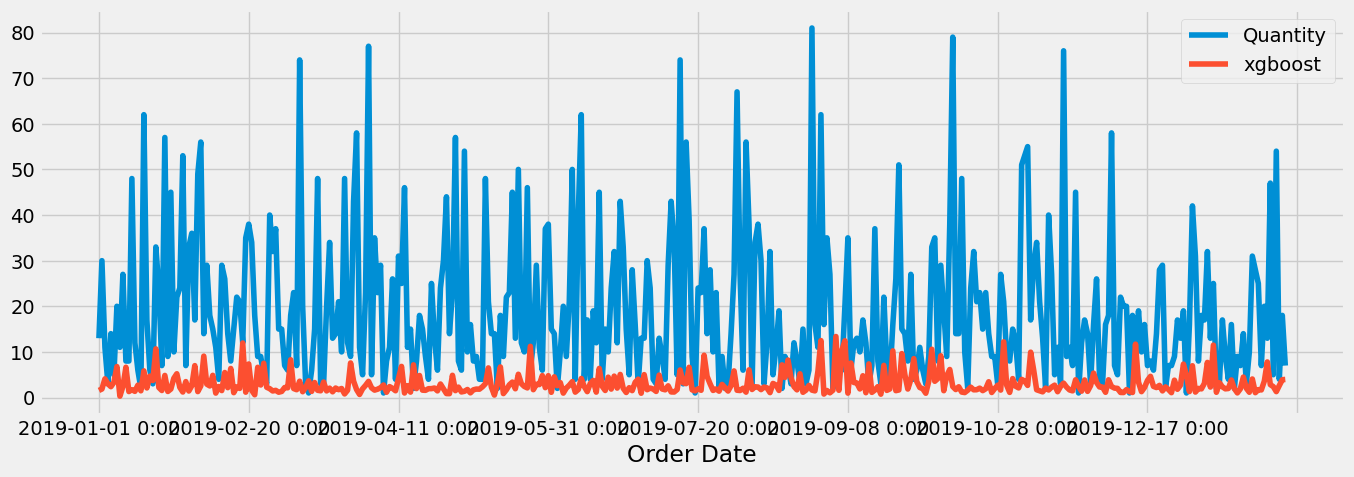

In [ ]:
xgboost = XG_model_month.predict(df_test_x)
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(xgboost, columns=['xgboost'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'xgboost']]
result.plot()

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 성능 척도 계산
r2 = r2_score(df_test_y, xgboost)
mae = mean_absolute_error(df_test_y, xgboost)
mse = mean_squared_error(df_test_y, xgboost)
rmse = mean_squared_error(df_test_y, xgboost, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -1.0113464889447052
MAE: 16.49098194381152
MSE: 523.9167544723141
RMSE: 22.88922791341626


In [ ]:
# 모델 예측
lgb_test = lgb.Dataset(data=df_test_x, label=df_test_y)

pred = lgb_model.predict(df_test_x, num_iteration=lgb_model.best_iteration)


In [ ]:
r2 = r2_score(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
mse = mean_squared_error(df_test_y, pred)
rmse = mean_squared_error(df_test_y, pred, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -0.9953585403923846
MAE: 16.384791998724957
MSE: 519.7522039275708
RMSE: 22.798074566234114


<Axes: xlabel='Order Date'>

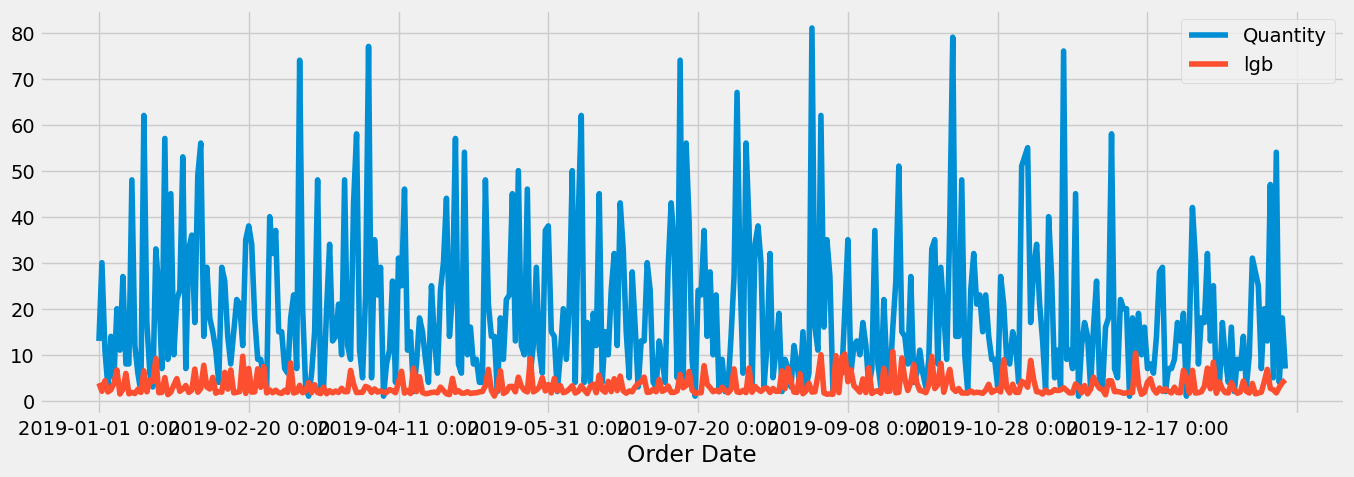

In [ ]:
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(pred, columns=['lgb'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'lgb']]
result.plot()

# 한솔쿤 Test2

In [ ]:
location3 = ("/content/weak_test2.csv")
han1 = pd.read_csv(location3)
han1 = han1.set_index('Order Date')

In [ ]:
new_order = ['Quantity', 'Sales', 'Discount', 'Profit']
han1 = han1.reindex(columns=new_order)
han1
# Add columns with year, month, and weekday name
han1['Year']         = pd.DatetimeIndex(han1.index).year
han1['Month']        = pd.DatetimeIndex(han1.index).month
#merged_df['Weekday Name'] = pd.DatetimeIndex(merged_df.index).weekday_name

# Display a random sampling of 5 rows
#merged_df.sample(10, random_state=0)df = han1
split = "2019-01-01"
df_train = df[:split]
df_test = df[split:]
df_train_y = df_train.loc[:,'Quantity']
df_train_x = df_train.drop('Quantity', axis=1)
df_test_y = df_test.loc[:,'Quantity']
df_test_x = df_test.drop('Quantity', axis=1)
df_test_orig = df_test.loc[:, ['Month','Year','Quantity','Sales','Profit','Discount']]
# XGBoost 모델 불러오기
XG_model_month = joblib.load('XG_model_month.joblib')

# LightGBM 모델 불러오기
lgb_model = lgb.Booster(model_file='lgb_model.txt')

<Axes: xlabel='Order Date'>

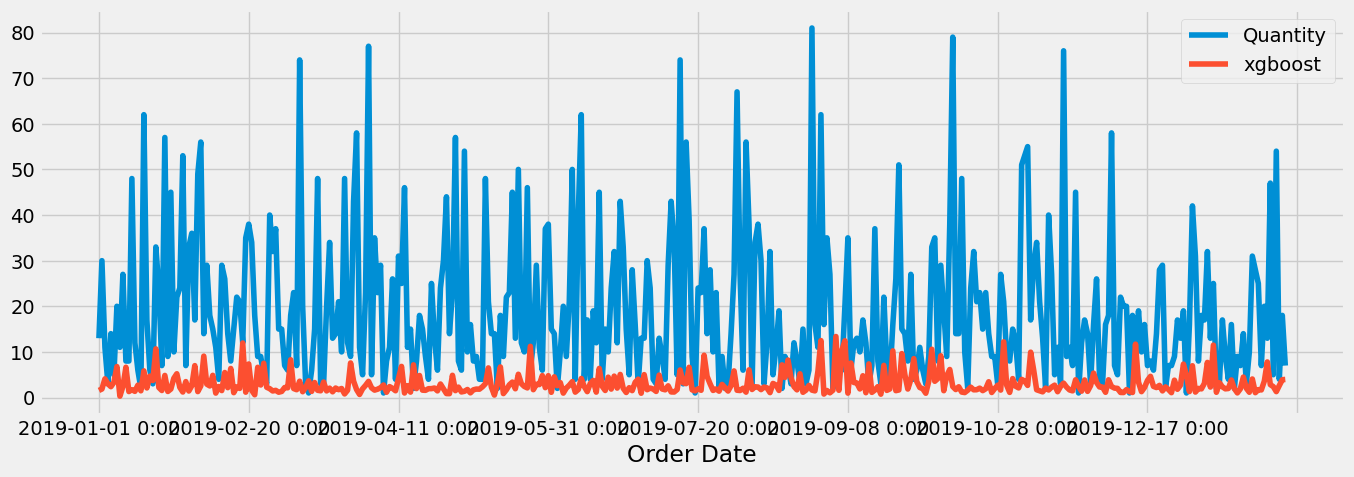

In [ ]:
xgboost = XG_model_month.predict(df_test_x)
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(xgboost, columns=['xgboost'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'xgboost']]
result.plot()

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 성능 척도 계산
r2 = r2_score(df_test_y, xgboost)
mae = mean_absolute_error(df_test_y, xgboost)
mse = mean_squared_error(df_test_y, xgboost)
rmse = mean_squared_error(df_test_y, xgboost, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -1.0113464889447052
MAE: 16.49098194381152
MSE: 523.9167544723141
RMSE: 22.88922791341626


In [ ]:
# 모델 예측
lgb_test = lgb.Dataset(data=df_test_x, label=df_test_y)

pred = lgb_model.predict(df_test_x, num_iteration=lgb_model.best_iteration)


In [ ]:
r2 = r2_score(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
mse = mean_squared_error(df_test_y, pred)
rmse = mean_squared_error(df_test_y, pred, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -0.9953585403923846
MAE: 16.384791998724957
MSE: 519.7522039275708
RMSE: 22.798074566234114


<Axes: xlabel='Order Date'>

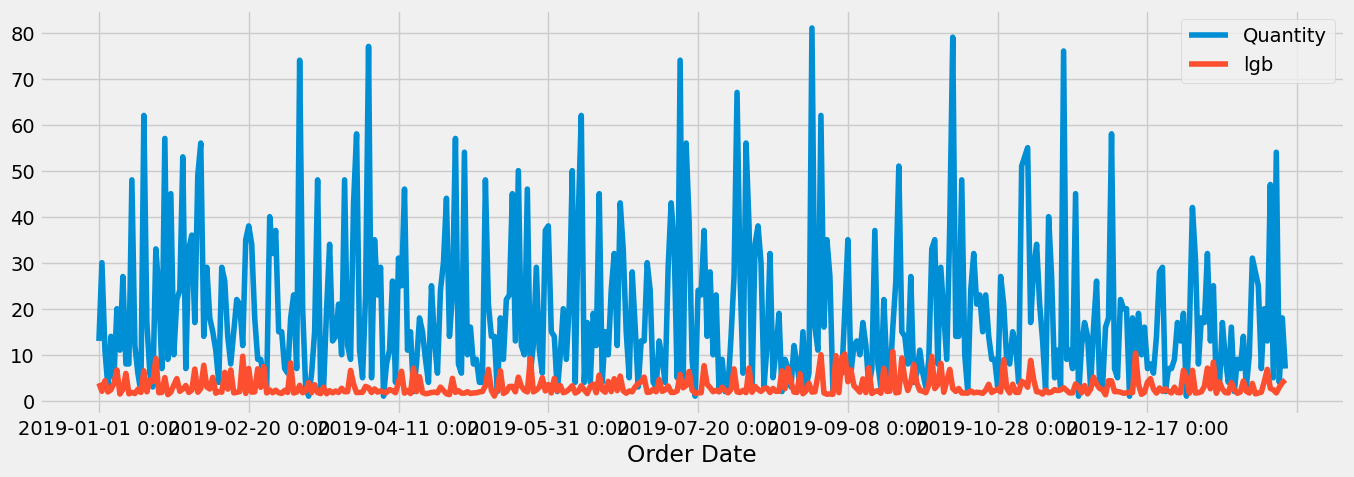

In [ ]:
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(pred, columns=['lgb'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'lgb']]
result.plot()

#한솔쿤 Test3

In [ ]:
location3 = ("/content/weak_test3.csv")
han1 = pd.read_csv(location3)
han1 = han1.set_index('Order Date')

In [ ]:
new_order = ['Quantity', 'Sales', 'Discount', 'Profit']
han1 = han1.reindex(columns=new_order)
han1
# Add columns with year, month, and weekday name
han1['Year']         = pd.DatetimeIndex(han1.index).year
han1['Month']        = pd.DatetimeIndex(han1.index).month
#merged_df['Weekday Name'] = pd.DatetimeIndex(merged_df.index).weekday_name

# Display a random sampling of 5 rows
#merged_df.sample(10, random_state=0)df = han1
split = "2019-01-01"
df_train = df[:split]
df_test = df[split:]
df_train_y = df_train.loc[:,'Quantity']
df_train_x = df_train.drop('Quantity', axis=1)
df_test_y = df_test.loc[:,'Quantity']
df_test_x = df_test.drop('Quantity', axis=1)
df_test_orig = df_test.loc[:, ['Month','Year','Quantity','Sales','Profit','Discount']]
# XGBoost 모델 불러오기
XG_model_month = joblib.load('XG_model_month.joblib')

# LightGBM 모델 불러오기
lgb_model = lgb.Booster(model_file='lgb_model.txt')

<Axes: xlabel='Order Date'>

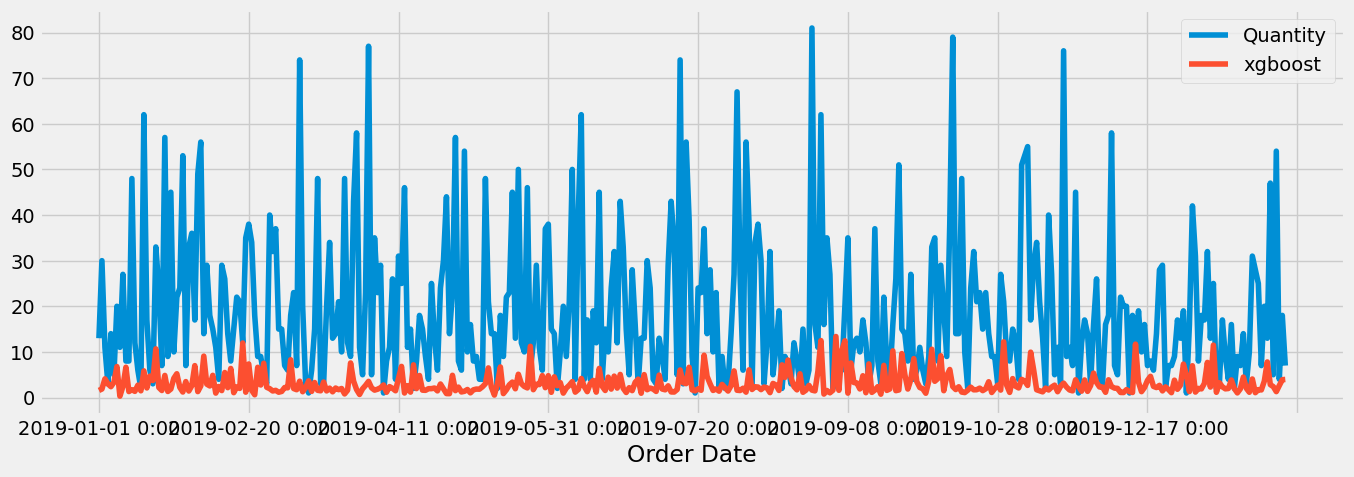

In [ ]:
xgboost = XG_model_month.predict(df_test_x)
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(xgboost, columns=['xgboost'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'xgboost']]
result.plot()

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 성능 척도 계산
r2 = r2_score(df_test_y, xgboost)
mae = mean_absolute_error(df_test_y, xgboost)
mse = mean_squared_error(df_test_y, xgboost)
rmse = mean_squared_error(df_test_y, xgboost, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -1.0113464889447052
MAE: 16.49098194381152
MSE: 523.9167544723141
RMSE: 22.88922791341626


In [ ]:
# 모델 예측
lgb_test = lgb.Dataset(data=df_test_x, label=df_test_y)

pred = lgb_model.predict(df_test_x, num_iteration=lgb_model.best_iteration)


In [ ]:
r2 = r2_score(df_test_y, pred)
mae = mean_absolute_error(df_test_y, pred)
mse = mean_squared_error(df_test_y, pred)
rmse = mean_squared_error(df_test_y, pred, squared=False)

# 결과 출력
print('R-squared:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R-squared: -0.9953585403923846
MAE: 16.384791998724957
MSE: 519.7522039275708
RMSE: 22.798074566234114


<Axes: xlabel='Order Date'>

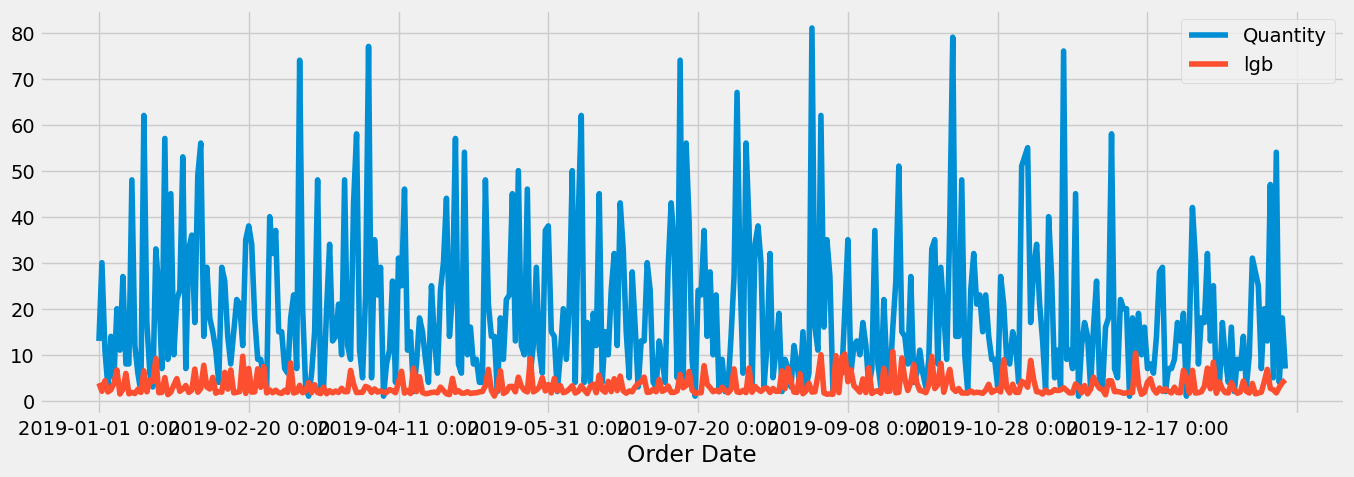

In [ ]:
result=pd.concat([df_test_orig.reset_index(), pd.DataFrame(pred, columns=['lgb'])], axis=1, ignore_index=False)
result
result = result.set_index('Order Date')
result = result.loc[:, ['Quantity', 'lgb']]
result.plot()